# Insert and Exploretion of data

To import Creditcard dataset, checking for missing values, 

In [1]:
!pip install unicodecsv
import unicodecsv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


f = open('creditcard.csv', 'rb')
with open('creditcard.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    creditcard = list(reader)
   
df = pd.DataFrame(creditcard)

In [2]:
print(df.isna().any().any())  # Detect missing values and return true if there is any missing values
#df = df.apply(pd.to_numeric)
for i in range(0, 31):
  if i > 0 and i < 30:
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], downcast='float')
  elif i == 0:
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], downcast='signed')
  elif i == 30:
    df.iloc[:,i] = pd.Categorical(df.iloc[:,i])

False


In [3]:
dfu = df.drop_duplicates()

# Data imbalance and overfitting

 

In [4]:
import numpy as np
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
%matplotlib inline

In [5]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from numpy import percentile
import time

target = pd.DataFrame(dfu.iloc[:,30])
#datas = StandardScaler().fit(target)
yTarget = pd.DataFrame(target).to_numpy()
time_start = time.perf_counter()


sc = StandardScaler()
data = pd.DataFrame(dfu.iloc[:,0:30])

#dfy = pd.Categorical(datas.transform(target))
dataf = sc.fit(data)
dfX = dataf.transform(data)
pca = PCA(n_components=1)  # Reduce to k=3 dimensions)
X_reduce = pca.fit_transform(dfX)
q1, q3 = percentile(X_reduce, 25), percentile(X_reduce, 75)
iqr = np.abs(q3 - q1)
margin = iqr * 1.5
lower, upper = q1 - margin, q3 + margin
i =0
l = 0
w=0
for x in X_reduce:
    if x < upper and x > lower:
        if yTarget[i] == "1":
            w=w+1
        l=l+1
    i=i+1
    
time_elapsed = (time.perf_counter() - time_start)
#memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
print ("%5.1f secs" % (time_elapsed)) 
print(l)
print(w)

  5.6 secs
250675
353


# Smote


In [6]:
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTEENN# doctest: +NORMALIZE_WHITESPACE
import time

time_start = time.perf_counter()
sm = SMOTEENN(sampling_strategy=0.1, random_state=42)
X_res, y_res = sm.fit_resample(dfX, target)
print('Resampled dataset shape %s' % Counter(y_res))
time_elapsed = (time.perf_counter() - time_start)
print ("%5.1f secs" % (time_elapsed)) 


Resampled dataset shape Counter({'Class': 1})
3952.8 secs


In [7]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE

time_start = time.perf_counter()
cc = RandomUnderSampler(random_state=42)
X_cc, y_cc = cc.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_cc))
time_elapsed = (time.perf_counter() - time_start)
print ("%5.1f secs" % (time_elapsed))

Resampled dataset shape Counter({'Class': 1})
  1.5 secs


# Unsupervised Model one class SVM

In [8]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time
print(len(X_cc))
time_start = time.perf_counter()
X_train, X_test, y_train, y_test = train_test_split(X_cc, y_cc, test_size=0.3, random_state=0)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3],
                     'C': [100]}]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, tuned_parameters, cv=5)
clf.fit(X_train, y_train)
time_elapsed = (time.perf_counter() - time_start)
print ("%5.1f secs" % (time_elapsed)) 
sorted(clf.cv_results_.keys())

56632


C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

637.9 secs


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [9]:
print(clf.best_estimator_.get_params(deep=True))
print(clf.best_estimator_.score)

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
<bound method ClassifierMixin.score of SVC(C=100, gamma=0.001, probability=True)>


# Accuracy SVM bes_estimator

In [10]:
from sklearn import model_selection
import time
time_start = time.perf_counter()
kfold = model_selection.KFold(n_splits=5, random_state=7, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(clf.best_estimator_, X_test, y_test, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
time_elapsed = (time.perf_counter() - time_start)
print ("%5.1f secs" % (time_elapsed))

C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Accuracy: 0.972 (0.003)
 79.1 secs


In [11]:
from sklearn import model_selection
import time
time_start = time.perf_counter()
scoring = 'accuracy'
results = model_selection.cross_val_score(clf.best_estimator_, dfX, target, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
time_elapsed = (time.perf_counter() - time_start)
print ("%5.1f secs" % (time_elapsed))

C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Accuracy: 0.999 (0.000)
1185.7 secs


In [12]:
time_start = time.perf_counter()
scoring = 'neg_log_loss'
resultslog = model_selection.cross_val_score(clf.best_estimator_, dfX, target , cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (resultslog.mean(), resultslog.std()))
time_elapsed = (time.perf_counter() - time_start)
print ("%5.1f secs" % (time_elapsed))

C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Antonio franco\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Logloss: -0.004 (0.001)
1206.4 secs


In [13]:
from sklearn.metrics import classification_report
time_start = time.perf_counter()
predicted = clf.best_estimator_.predict(dfX)
report = classification_report(target, predicted)
print(report)
time_elapsed = (time.perf_counter() - time_start)
print ("%5.1f secs" % (time_elapsed))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    283253
           1       0.09      0.97      0.17       473

    accuracy                           0.98    283726
   macro avg       0.55      0.98      0.58    283726
weighted avg       1.00      0.98      0.99    283726

 97.7 secs


No Skill: ROC AUC=0.500
SVM with hybrid sampling: ROC AUC=0.996


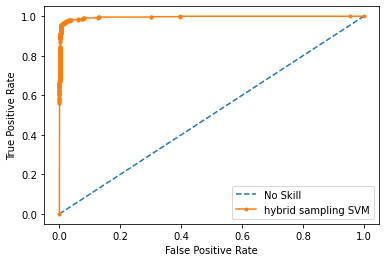

 87.0 secs


In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

time_start = time.perf_counter()
#scoring = 'roc_auc'
#resultsauc = model_selection.cross_val_score(clf, df_X.iloc[:,0:30], Y['Class'] , cv=kfold, scoring=scoring)
#print("AUC: %.3f (%.3f)" % (resultsauc.mean(), resultsauc.std()))

ns_probs = [0 for _ in range(len(target))]
# predict probabilities
lr_probs = clf.best_estimator_.predict_proba(dfX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
#tar = pd.to_numeric(, errors ='ignore') 
tar = pd.DataFrame(data=target, dtype=np.int8)

ns_auc = roc_auc_score(tar.values.ravel(), ns_probs)
lr_auc = roc_auc_score(tar.values.ravel(), lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM with hybrid sampling: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(tar.values.ravel(), ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(tar.values.ravel(), lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='hybrid sampling SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
time_elapsed = (time.perf_counter() - time_start)
print ("%5.1f secs" % (time_elapsed))

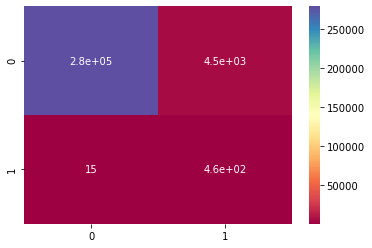

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
predicted = clf.best_estimator_.predict(dfX)
matrix = confusion_matrix( target, predicted)
sns.heatmap(matrix, annot=True, cmap='Spectral')

# Something else

In [ ]:
#not normalize
over = RandomOverSampler(sampling_strategy=0.1)
x = pd.DataFrame(dfu.iloc[:,0:30])
yw = pd.DataFrame(dfu.iloc[:,30])
print(yw)
X_train_over, y_train_over = over.fit_sample(x, yw)

svm_smote = SVMSMOTE()
X_train_smote, y_train_smote = svm_smote.fit_sample(X_train_over, y_train_over)

under = RandomUnderSampler()
X_train, y_train = under.fit_sample(X_train_smote, y_train_smote)



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = pd.DataFrame(X_train)
target = pd.DataFrame(y_train)
#datas = StandardScaler().fit(target)
#dfy = pd.Categorical(datas.transform(target))
dataf = sc.fit(data)
dfX = dataf.transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_final, X_test, y_train_final, y_test = train_test_split(dfX, target, test_size = 0.3, random_state = 0)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_final, y_train_final)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred)))

In [ ]:
#under = RandomUnderSampler()
#X_train, y_train = under.fit_sample(X_train_smote, y_train_smote)
from sklearn.model_selection import train_test_split
X_train_final, X_test, y_train_final, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_final, y_train_final)
np.any(np.isinf(X_test))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred)))

In [ ]:
y =  target#[target["Class"] == '1']
xb = dfu#[dfu['Class'] == '1']
xbb = xb.iloc[:,0:30]
xc = sc.fit(xbb)
x = xc.transform(xbb)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x)
cm = confusion_matrix( y, y_pred)
print(cm)
accuracy_score( y, y_pred)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
xb = dfu
xbb = xb.iloc[:,0:30]
xc = sc.fit(xbb)
x = xc.transform(xbb)

cif = IsolationForest(max_samples =len(dfu), random_state = 10, contamination = 0.002, n_estimators = 100, max_features=30)


cif.fit(xbb)

target['Score'] = cif.decision_function(x)

print('Fraud', np.mean(target[target["Class"] == '1']['Score']))
print('not', np.mean(target[target["Class"] == '0']['Score']))

In [ ]:
print(len(y_train))
len(X_train)

In [ ]:

cif = IsolationForest (max_samples = len(X_train), random_state = 10, contamination = 0.02, n_estimators = len(X_train), max_features=30)

cif.fit(X_train)

y_train['Score'] = cif.decision_function(X_train)

print('Fraud', np.mean(y_train[y_train["Class"] == '1']['Score']))
print('not', np.mean(y_train[y_train["Class"] == '0']['Score']))

In [ ]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime
xb = dfu
xbb = xb.iloc[:,0:30]
xc = sc.fit(xbb)
x = xc.transform(xbb)
tg = xb.iloc[:,30]
X_train_if, X_test, y_train_if, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 0)
#scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score, pos_label=-1)}
#param_grid={'n_estimators': range(1, 500, 100)}
cif = IsolationForest(n_jobs=-1, random_state = 10, contamination = 0.0015, n_estimators = 3, max_samples='auto', max_features=30)
#gs = GridSearchCV(cif, ,scoring=scoring, refit='Recall')
#clf = IsolationForest(random_state=47, behaviour='new')


cif.fit(X_train_if, y_train_if)
y_pred = cif.predict(X_train_if)

In [ ]:

cif.fit(X_train_if, y_train_if)
y_pred = cif.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

#cm = confusion_matrix(y_train_if, y_pred)
#print(classification_report(y_train_if, y_pred, target_names=['normal', 'fraud']))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred)))

cm = confusion_matrix( y_test, y_pred)
print(cm)
accuracy_score( y_test, y_pred)
#plot_confusion_matrix(cm, title="IF Confusion Matrix")